## Import some helper modules 

In [812]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [813]:
from datasist.structdata import detect_outliers
from sklearn.preprocessing import OneHotEncoder , StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from category_encoders import BinaryEncoder
import joblib

In [814]:
warnings.filterwarnings('ignore')

In [815]:
sns.set_theme(context = 'notebook' , style = 'darkgrid' , palette = 'mako' 
              , font_scale = 1.1 , rc = {'figure.figsize' : (8 , 4)})

In [816]:
%matplotlib inline

###### Read dataset

In [817]:
df = pd.read_csv('dataset.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


###### Change columns name

In [818]:
col = ['Posted_By', 'Under_Construction', 'approved', 'Number_of_Rooms', 'Property_type',
       'House_areaSQF', 'Ready_to_move', 'Resale', 'Address', 'Longitude',
       'Latitude', 'Price']

In [819]:
df.columns = col

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Posted_By           29451 non-null  object 
 1   Under_Construction  29451 non-null  int64  
 2   approved            29451 non-null  int64  
 3   Number_of_Rooms     29451 non-null  int64  
 4   Property_type       29451 non-null  object 
 5   House_areaSQF       29451 non-null  float64
 6   Ready_to_move       29451 non-null  int64  
 7   Resale              29451 non-null  int64  
 8   Address             29451 non-null  object 
 9   Longitude           29451 non-null  float64
 10  Latitude            29451 non-null  float64
 11  Price               29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


###### Remove duplicates 

In [821]:
df.duplicated().sum()

401

In [822]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [823]:
df.index

RangeIndex(start=0, stop=29050, step=1)

In [824]:
df.isnull().mean()*100

Posted_By             0.0
Under_Construction    0.0
approved              0.0
Number_of_Rooms       0.0
Property_type         0.0
House_areaSQF         0.0
Ready_to_move         0.0
Resale                0.0
Address               0.0
Longitude             0.0
Latitude              0.0
Price                 0.0
dtype: float64

###### Univariate Analysis

In [825]:
df['Posted_By'].value_counts().to_frame().T

,Dealer,Owner,Builder
Posted_By,17961,10470,619


<AxesSubplot:xlabel='Posted_By', ylabel='count'>

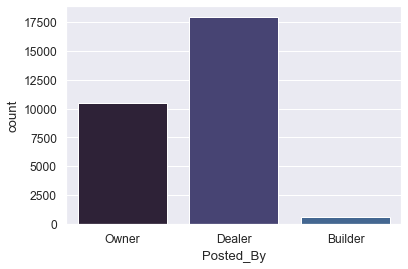

In [826]:
sns.countplot(df['Posted_By'])

In [827]:
df['Under_Construction'].value_counts().to_frame().T

,0,1
Under_Construction,23851,5199


<AxesSubplot:xlabel='Under_Construction', ylabel='count'>

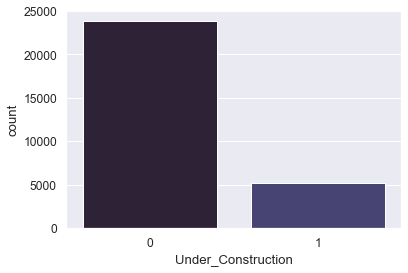

In [828]:
sns.countplot(df['Under_Construction'])

In [829]:
df.columns

Index(['Posted_By', 'Under_Construction', 'approved', 'Number_of_Rooms',
       'Property_type', 'House_areaSQF', 'Ready_to_move', 'Resale', 'Address',
       'Longitude', 'Latitude', 'Price'],
      dtype='object')

In [830]:
df['approved'].value_counts().to_frame().T

,0,1
approved,19874,9176


<AxesSubplot:xlabel='approved', ylabel='count'>

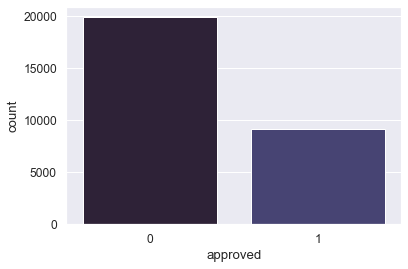

In [831]:
sns.countplot(df['approved'])

In [832]:
df['Number_of_Rooms'].value_counts().to_frame().T

,2,3,1,4,5,6,7,8,20,10,15,12,9,13,17,11
Number_of_Rooms,13164,10365,3540,1698,189,52,11,10,4,4,4,3,3,1,1,1


In [833]:
df['Property_type'].value_counts()

BHK    29026
RK        24
Name: Property_type, dtype: int64

<AxesSubplot:xlabel='Property_type', ylabel='count'>

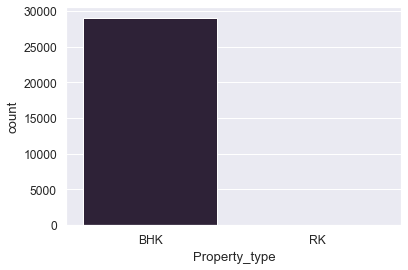

In [834]:
sns.countplot(df['Property_type'])

In [835]:
df.columns

Index(['Posted_By', 'Under_Construction', 'approved', 'Number_of_Rooms',
       'Property_type', 'House_areaSQF', 'Ready_to_move', 'Resale', 'Address',
       'Longitude', 'Latitude', 'Price'],
      dtype='object')

In [836]:
df['House_areaSQF'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
House_areaSQF,29050.0,20031.714046,1.914411e+06,3.0,900.0,1172.741625,1550.169109,254545454.5


<AxesSubplot:xlabel='House_areaSQF'>

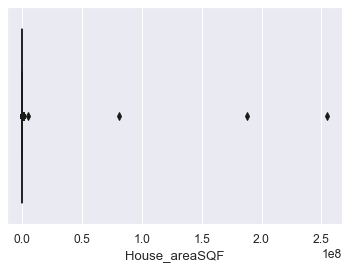

In [837]:
sns.boxplot(df['House_areaSQF'])

<AxesSubplot:xlabel='House_areaSQF', ylabel='Density'>

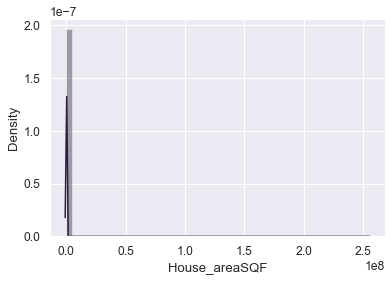

In [838]:
sns.distplot(df['House_areaSQF'])

In [839]:
len(detect_outliers(df, 0 , ['House_areaSQF']))

1612

###### Drop House area outliers 

In [840]:
df.drop(detect_outliers(df, 0 , ['House_areaSQF']) , axis = 0 , inplace = True)

In [841]:
df.reset_index(inplace = True , drop = True)

<AxesSubplot:xlabel='House_areaSQF'>

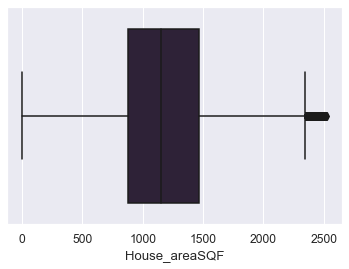

In [842]:
sns.boxplot(df['House_areaSQF'])

<AxesSubplot:xlabel='House_areaSQF', ylabel='Density'>

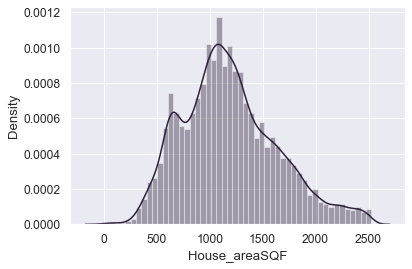

In [843]:
sns.distplot(df['House_areaSQF'])

In [844]:
df['Ready_to_move'].value_counts().to_frame().T

,1,0
Ready_to_move,22518,4920


<AxesSubplot:xlabel='Ready_to_move', ylabel='count'>

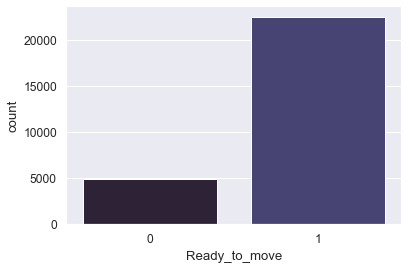

In [845]:
sns.countplot(df['Ready_to_move'])

In [846]:
df['Resale'].value_counts()

1    25642
0     1796
Name: Resale, dtype: int64

<AxesSubplot:xlabel='Resale', ylabel='count'>

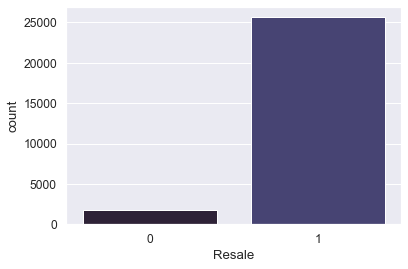

In [847]:
sns.countplot(df['Resale'])

In [848]:
df.columns

Index(['Posted_By', 'Under_Construction', 'approved', 'Number_of_Rooms',
       'Property_type', 'House_areaSQF', 'Ready_to_move', 'Resale', 'Address',
       'Longitude', 'Latitude', 'Price'],
      dtype='object')

###### Get city & road from address

In [849]:
df['Road'] = df['Address'].apply(lambda x : x.split(',')[0].strip().lower())
df['City'] = df['Address'].apply(lambda x : x.split(',')[1].strip().lower())

In [850]:
cty_freq = df['City'].value_counts()
cty_lst = [i for i,j in zip(cty_freq.index , cty_freq.values) if j < 80]
df['City'] = df['City'].apply(lambda x : 'Other' if x in cty_lst else x)

In [851]:
rod_freq = df['Road'].value_counts()
rod_lst = [i for i,j in zip(rod_freq.index , rod_freq.values) if j < 70]
df['Road'] = df['Road'].apply(lambda x : 'Other' if x in rod_lst else x)

In [852]:
len(df['Road'].value_counts())

47

In [853]:
df.drop(['Address','Longitude', 'Latitude'] , axis = 1 , inplace = True)

###### Encode categorical Columns 

In [854]:
col_to_encode = ['Posted_By' , 'Property_type' , 'Road' , 'City']

In [855]:
encoder = BinaryEncoder()

In [856]:
df = pd.concat([df , encoder.fit_transform(df[col_to_encode]) ] , axis = 1)

In [857]:
df.drop(col_to_encode , inplace = True , axis = 1 )

In [858]:
df

,Under_Construction,approved,Number_of_Rooms,House_areaSQF,Ready_to_move,Resale,Price,Posted_By_0,Posted_By_1,Property_type_0,...,Road_2,Road_3,Road_4,Road_5,City_0,City_1,City_2,City_3,City_4,City_5
0,0,0,2,1300.236407,1,1,55.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2,1275.000000,1,1,51.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2,933.159722,1,1,43.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,2,929.921143,1,1,62.5,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,1,0,2,999.009247,0,1,60.5,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,0,0,3,2500.000000,1,1,45.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
27434,0,0,2,769.230769,1,1,16.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
27435,0,0,2,1022.641509,1,1,27.1,1,0,0,...,0,1,1,0,0,0,0,1,1,0
27436,0,0,2,927.079009,1,1,67.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


###### Split data into train & test 

In [859]:
x = df.drop(['Price'] , axis = 1)
y = np.log(df['Price'])

In [860]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 
                                                       , random_state = 7)

###### Scale numerical columns 

In [861]:
sclr = RobustScaler()

In [862]:
col_to_scale = ['House_areaSQF' , 'Number_of_Rooms']

In [863]:
x_train[col_to_scale] = sclr.fit_transform(x_train[col_to_scale])

In [864]:
x_test[col_to_scale] = sclr.transform(x_test[col_to_scale])

In [865]:
model = LinearRegression()

In [866]:
model.fit(x_train , y_train)

LinearRegression()

In [867]:
y_pred = model.predict(x_test)

In [868]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

0.5213734210553259

In [869]:
mean_absolute_error(y_true = y_test , y_pred = y_pred)

0.39352110234803367

In [870]:
model.score(x_test , y_test)

0.5301398418590403

In [871]:
r2_score(y_true = y_test , y_pred = y_pred)

0.5301398418590403

In [872]:
joblib.dump(model , 'model.pkl')

['model.pkl']

In [873]:
joblib.dump(sclr , 'sclr.pkl') 

['sclr.pkl']